In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import time, warnings
warnings.filterwarnings("ignore")
from torchvision import transforms, datasets
from copy import deepcopy
from main import RC, config

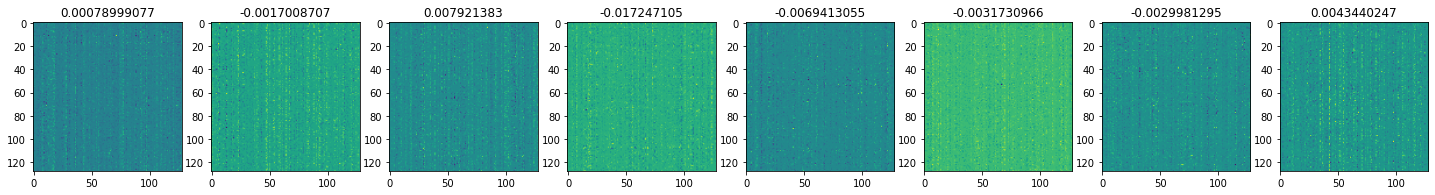

In [49]:
from sparch import SNN, RadLIFLayer,ReadoutLayer, SpikeFunctionBoxcar, Experiment, config, load_shd_or_ssc
# exp = Experiment()
model = SNN()
model_log, mask = torch.load(r'./log\07-30-03-31\checkpoints\best_model-0.9116161616161617.tar', map_location='cpu')
plt.figure(figsize=(25,5))
for i in range(8):
    plt.subplot(1,8,i+1)
    original_cluster = model_log.snn[0].V.weight.data.numpy()[i*128:(i+1)*128, i*128:(i+1)*128]
    mask_i = mask[0].cpu().numpy()[i*128:(i+1)*128, i*128:(i+1)*128]
    plt.imshow(original_cluster * mask_i)
    plt.title((original_cluster * mask_i).mean())

In [73]:
model, mask = torch.load(r'./log\07-30-03-31\checkpoints\best_model-0.9116161616161617.tar')
model = model.to('cuda')
valid_loader = load_shd_or_ssc(split='test', shuffle=False)
firing_ = np.zeros((2, 20, 1024))
label_count = [0] * 20
for step, (x, _, y) in enumerate(valid_loader):
    output, firing_rates, all_spikes = model(x.to('cuda'), [mask[0].to('cuda'), mask[1].to('cuda'), 0])
    for i, label in enumerate(y):
        label_count[label.item()] += 1
        firing_[0, label.item(), :] += all_spikes[0].mean(1)[i].cpu().detach().numpy()
        firing_[1, label.item(), :] += all_spikes[1].mean(1)[i].cpu().detach().numpy()

In [62]:
for i in range(20):
    firing_[i,:] /= label_count[i]

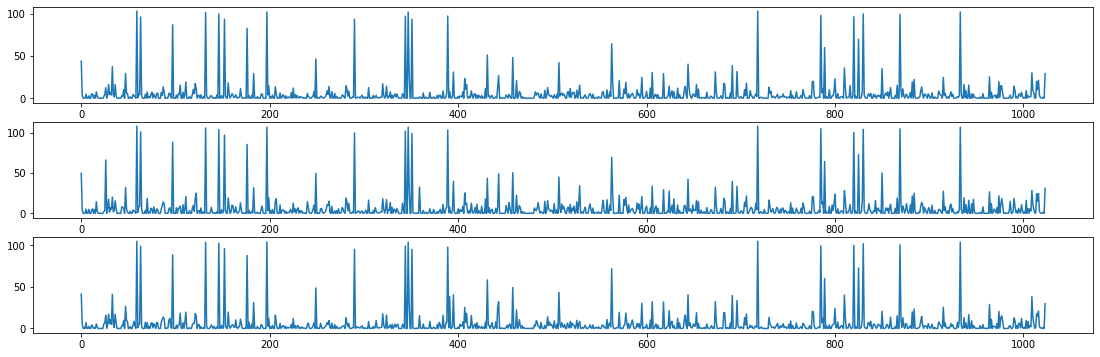

In [76]:
plt.figure(figsize=(19,6))
plt.subplot(3,1,1)
plt.plot(firing_[1,0,:])
plt.subplot(3,1,2)
plt.plot(firing_[1,1,:])
plt.subplot(3,1,3)
plt.plot(firing_[1,2,:])

In [1]:
from sparch import init_mask

In [3]:
m1 = init_mask(); m2 = init_mask()

In [4]:
m1[0:5,0:5]

tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1]], dtype=torch.int32)

In [ ]:
test_X = np.load('data/testX_4ms.npy')
test_y = np.load('data/testY_4ms.npy').astype(float)

tensor_testX = torch.Tensor(test_X)  # transform to torch tensor
tensor_testY = torch.Tensor(test_y)
test_dataset = torch.utils.data.TensorDataset(tensor_testX, tensor_testY)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=config.batch, shuffle=False)


In [8]:
from datetime import timedelta
import time
t = time.time()
time.sleep(2)
str(timedelta(seconds=time.time() - t))[5:]

'02.011833'

In [ ]:
model_file = r'F:\GitHubClone\Reservoir-Computing\NMNIST\log\07-17-21-29\model-0-50-96.77.tar'
date = model_file.split('\log')[1][1:12]
model_parameter, mask = torch.load(model_file)

config.device = 'cpu'
model = RC().to(config.device)
print(model.tau_adp_h1[0])
model.load_state_dict(model_parameter)
print(model.tau_adp_h1[0])
print((mask[0]==0).sum()/config.hid**2)